In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read from csv file and inspect the data
os_historical_df = pd.read_csv("states_2022-06-27-08-sample.csv")

In [3]:
os_historical_df.head()

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact
0,1656316810,3571d3,37.652710,-0.899885,116.301897,264.415498,0.32512,ARP41,False,False,False,5170.0,320.04,365.76,1.656317e+09,1.656317e+09
1,1656316810,3c56f4,57.841873,15.414084,221.622690,216.790099,2.60096,EWG4CP,False,False,False,3521.0,11399.52,11795.76,1.656317e+09,1.656317e+09
2,1656316810,3571d1,37.921417,-0.825494,147.314343,131.035345,1.30048,ARP41,False,False,False,6716.0,3063.24,3253.74,1.656317e+09,1.656317e+09
3,1656316810,406696,46.272738,19.739685,249.717392,145.491477,0.00000,TOM51V,False,False,False,4617.0,11277.60,11772.90,1.656317e+09,1.656317e+09
4,1656316820,3571d3,37.654358,-0.911865,109.904552,293.445098,0.32512,ARP41,False,False,False,2036.0,312.42,365.76,1.656317e+09,1.656317e+09


In [4]:
# Fill missing values by carrying over the previous value
os_historical_df_filled = os_historical_df.ffill()

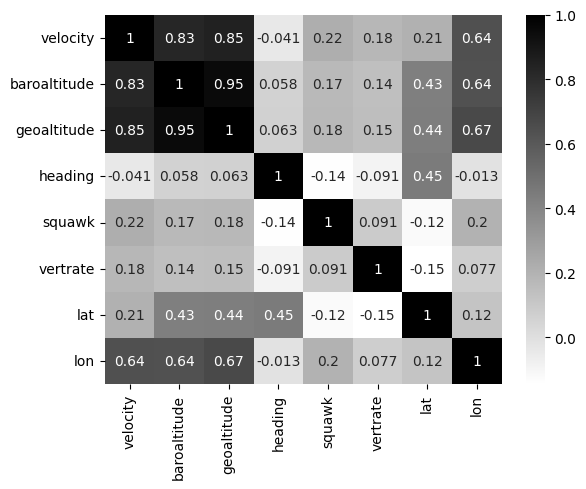

In [5]:
# Plot the correlation matrix
corr_matrix = os_historical_df_filled[["velocity", "baroaltitude", "geoaltitude", "heading", "squawk", "vertrate", "lat", "lon"]].corr()
sns.heatmap(corr_matrix, annot=True, cmap='gray_r')
plt.show()

In [6]:
# Create a copy of the dataframe and add a new column for formatted time
os_historical_df_filled_copy = os_historical_df_filled.copy()
os_historical_df_filled_copy["hms"] = pd.to_datetime(os_historical_df_filled_copy["time"], unit='s').dt.strftime('%H:%M:%S')
os_historical_df_filled_copy

,time,icao24,lat,lon,velocity,heading,vertrate,callsign,onground,alert,spi,squawk,baroaltitude,geoaltitude,lastposupdate,lastcontact,hms
0,1656316810,3571d3,37.652710,-0.899885,116.301897,264.415498,0.32512,ARP41,False,False,False,5170.0,320.04,365.76,1.656317e+09,1.656317e+09,08:00:10
1,1656316810,3c56f4,57.841873,15.414084,221.622690,216.790099,2.60096,EWG4CP,False,False,False,3521.0,11399.52,11795.76,1.656317e+09,1.656317e+09,08:00:10
2,1656316810,3571d1,37.921417,-0.825494,147.314343,131.035345,1.30048,ARP41,False,False,False,6716.0,3063.24,3253.74,1.656317e+09,1.656317e+09,08:00:10
3,1656316810,406696,46.272738,19.739685,249.717392,145.491477,0.00000,TOM51V,False,False,False,4617.0,11277.60,11772.90,1.656317e+09,1.656317e+09,08:00:10
4,1656316820,3571d3,37.654358,-0.911865,109.904552,293.445098,0.32512,ARP41,False,False,False,2036.0,312.42,365.76,1.656317e+09,1.656317e+09,08:00:20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1086,1656320370,406696,39.907325,26.718506,257.572612,135.809209,0.00000,TOM51V,False,False,False,4617.0,11277.60,11742.42,1.656320e+09,1.656320e+09,08:59:30
1087,1656320380,3c56f4,53.628159,10.001247,70.873880,230.300927,-3.25120,EWG4CP,True,False,False,3521.0,-106.68,83.82,1.656320e+09,1.656320e+09,08:59:40
1088,1656320380,406696,39.891404,26.738586,257.203994,135.729327,-0.32512,TOM51V,False,False,False,4617.0,11277.60,11742.42,1.656320e+09,1.656320e+09,08:59:40
1089,1656320390,3c56f4,53.628159,10.001247,70.873880,230.300927,-3.25120,EWG4CP,True,False,False,3521.0,10058.40,10576.56,1.656320e+09,1.656320e+09,08:59:50


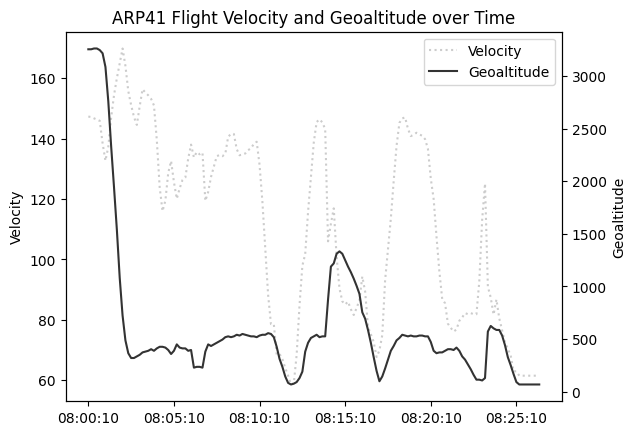

In [7]:
# filter the dataframe to only include rows where the callsign is ARP41 and icao24 is 3571d1
arp41 = os_historical_df_filled_copy.loc[(os_historical_df_filled_copy["callsign"].str.strip() == "ARP41") & ((os_historical_df_filled_copy["icao24"] == "3571d1"))]

# Plot the relationship between velocity and geoaltitude over time
fig, ax1 = plt.subplots()
ax1.set_title("ARP41 Flight Velocity and Geoaltitude over Time")
ax1.set_xticks(range(0, len(arp41), 30))
ax1.set_ylabel("Velocity")
ln1 = ax1.plot(arp41["hms"], arp41["velocity"], linestyle=":", color=(0.8, 0.8, 0.8), label="Velocity")
ax2 = ax1.twinx()
ax2.set_ylabel("Geoaltitude")
ln2 = ax2.plot(arp41["hms"], arp41["geoaltitude"], color=(0.2, 0.2, 0.2), label="Geoaltitude")
lns = ln1 + ln2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels)
plt.savefig("arp41_velocity_geoaltitude.png")